/tmp/ipykernel_137174/3598528774.py:40: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  samples = np.fromstring(content, dtype=types[sampwidth])


11
16000


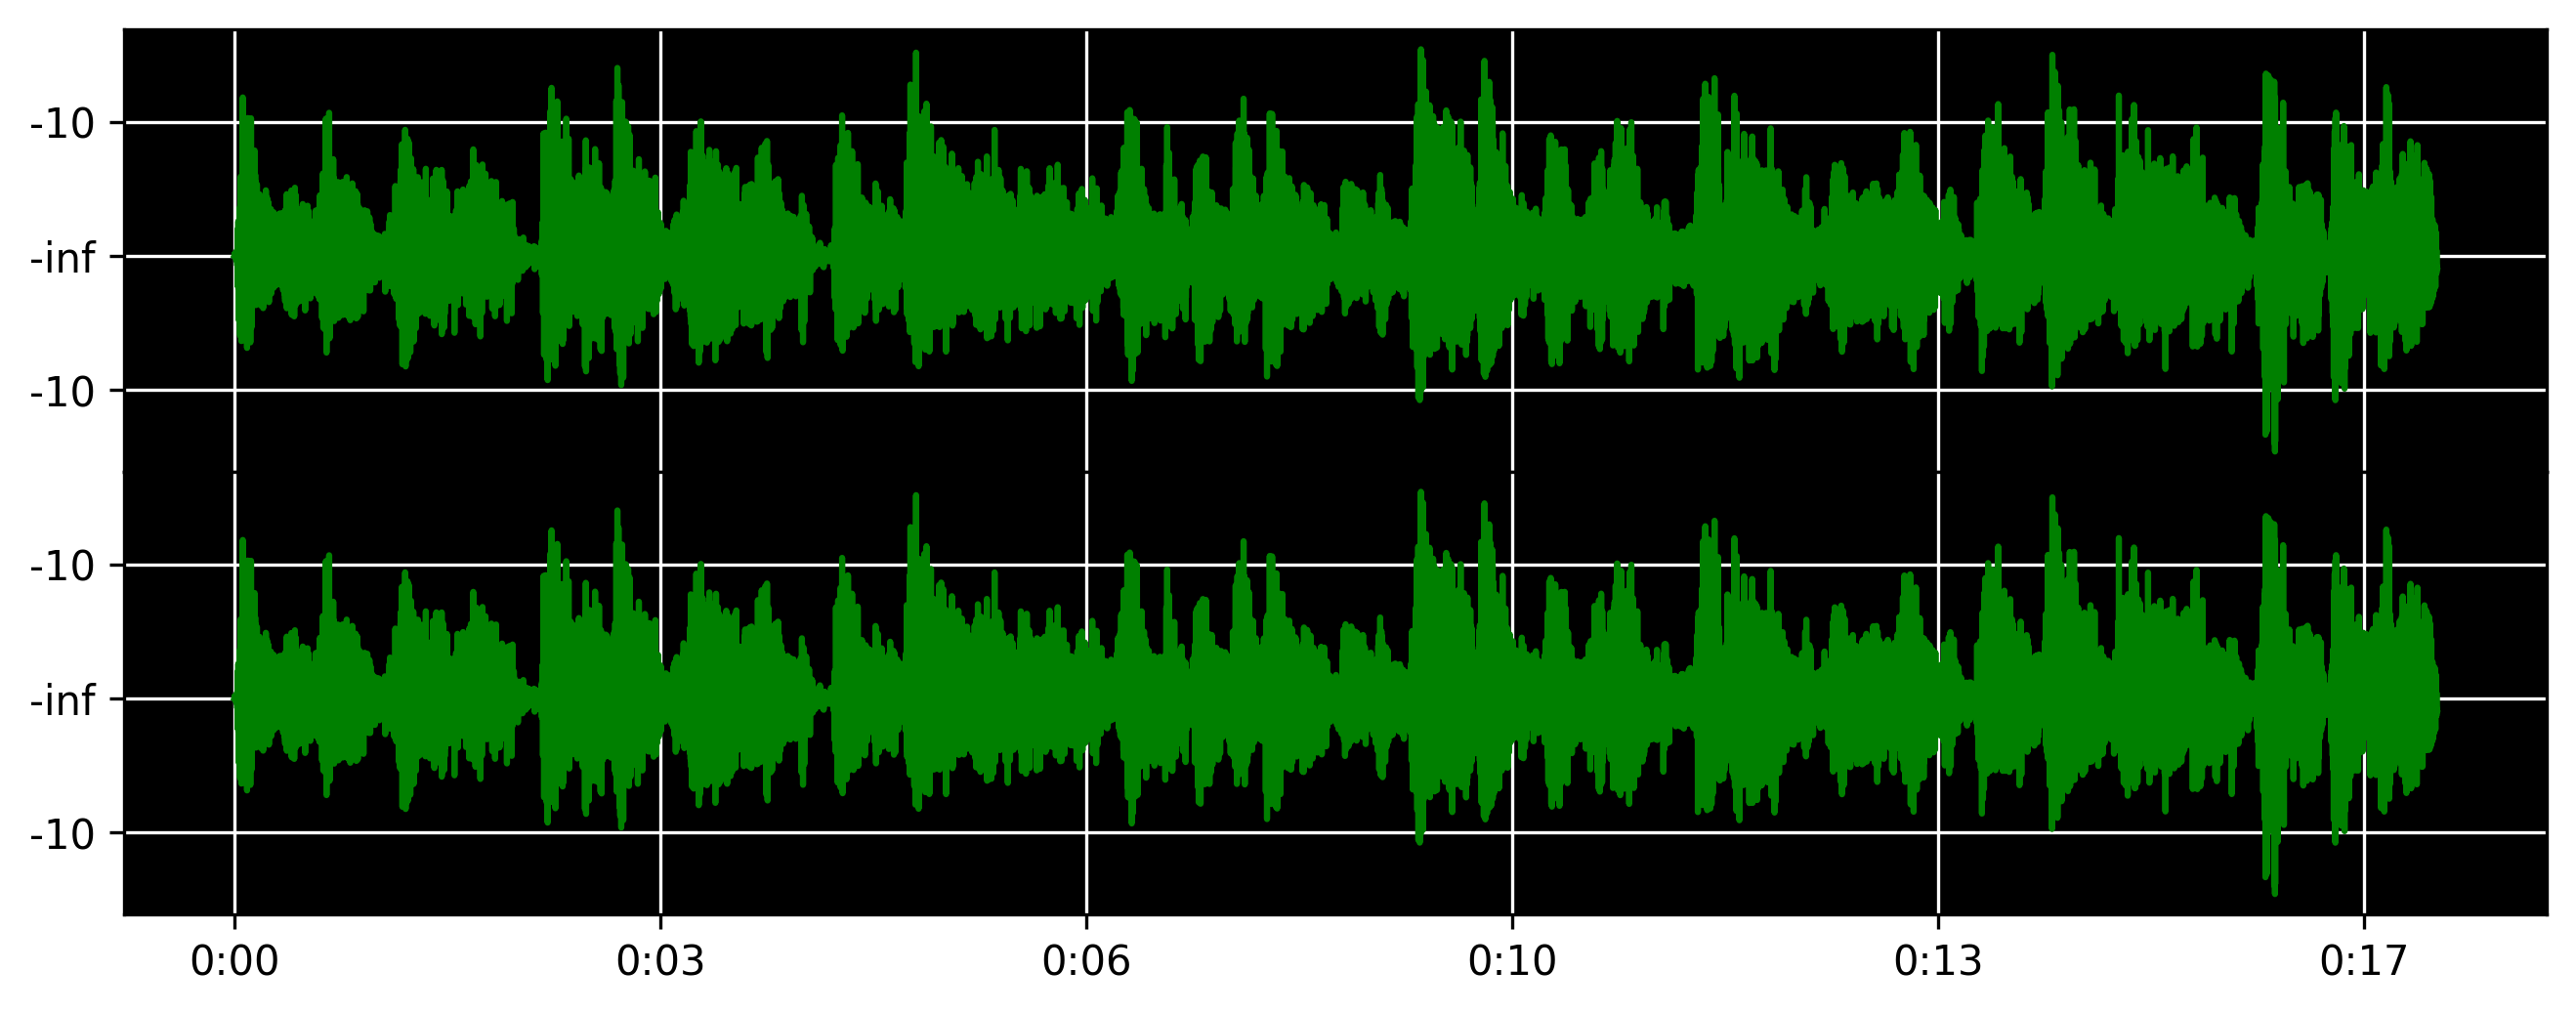

In [63]:
import scipy.io.wavfile as wavfile
import wave
import pylab as pl
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib as mp
import math

def format_time(x, pos=None):
    global duration, nframes, k
    progress = int(x / float(nframes) * duration * k)
    mins, secs = divmod(progress, 60)
    hours, mins = divmod(mins, 60)
    out = "%d:%02d" % (mins, secs)
    if hours > 0:
        out = "%d:" % hours
    return out

def format_db(x, pos=None):
    if pos == 0:
        return ""
    global peak
    if x == 0:
        return "-inf"

    db = 20 * math.log10(abs(x) / float(peak))
    return int(db)

wav = wave.open("in10.wav", mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
content = wav.readframes(nframes)

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

samples = np.fromstring(content, dtype=types[sampwidth])
duration = nframes / framerate 
w, h = 800, 300
DPI = 300
peak = 256 ** sampwidth / 2
k = int(nframes/w/32)
print(k)
plt.figure(1, figsize=(4*float(w)/DPI, 4*float(h)/DPI), dpi=DPI)
plt.subplots_adjust(wspace=0, hspace=0) 

for n in range(nchannels):
    channel = samples[n::nchannels]

    channel = channel[0::k]
    if nchannels == 1:
        channel = channel - peak
  
    axes = plt.subplot(2, 1, n+1, facecolor="k")
    axes.plot(channel, "g")
    axes.yaxis.set_major_formatter(mp.ticker.FuncFormatter(format_db))
    plt.grid(True, color="w")
    axes.xaxis.set_major_formatter(mp.ticker.NullFormatter())

axes.xaxis.set_major_formatter(mp.ticker.FuncFormatter(format_time))

plt.savefig("wave", dpi=DPI)
#plt.show()


data = samples[0::nchannels]


dest = wave.open("out.wav", mode="wb")
dest.setparams(wav.getparams())

newdata = samples[::-1]

newframes = struct.pack('<' + str(len(newdata)) + 'h', *newdata)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

/home/user/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


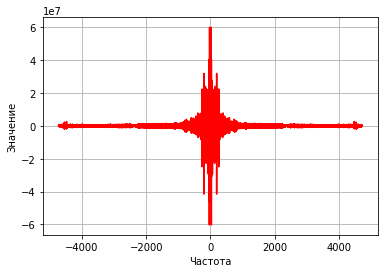

In [79]:
spectrum = np.fft.fft(samples)
N = np.shape(samples)[0]

freq = np.fft.fftfreq(N, 1./N)/60

plt.plot(freq, spectrum, c="red")
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.grid()
plt.show()

119999


/home/user/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


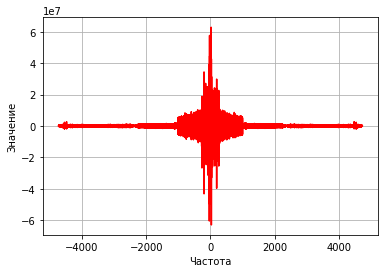

In [80]:
A = 10000000
ind = np.argwhere(np.abs(freq) < 1000)
L = len(ind)
print(L)
emp = np.zeros(N)
emp[ind] = A*(np.random.rand(L) - 0.5).reshape(-1, 1)

new_spectrum = spectrum + emp

plt.plot(freq, new_spectrum, c="red")
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.grid()
plt.show()

In [81]:
new_samples = np.fft.ifft(new_spectrum)

data = new_samples[0::nchannels]


dest = wave.open("out1.wav", mode="wb")
dest.setparams(wav.getparams())

newdata = new_samples.astype(int)

newframes = struct.pack('<' + str(len(newdata)) + 'h', *newdata)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

/tmp/ipykernel_137174/2677180004.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  newdata = new_samples.astype(int)


16000


In [82]:
new_spectrum[np.argwhere(np.abs(freq) < 1000)] = 0

In [83]:
new_samples = np.fft.ifft(new_spectrum)

data = new_samples[0::nchannels]


dest = wave.open("out2.wav", mode="wb")
dest.setparams(wav.getparams())

newdata = new_samples.astype(int)

newframes = struct.pack('<' + str(len(newdata)) + 'h', *newdata)
# записываем содержимое в преобразованный файл.
dest.writeframes(newframes)
wav.close()
dest.close()
print(framerate)

16000


/tmp/ipykernel_137174/3427974589.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  newdata = new_samples.astype(int)
